# TSA HW#6

Name: Dhanabordee Mekintharanggur

Student ID: T11902203

**Notes**

This is a .ipynb file created in Google Colab .However, all of the code for this assignment is in R language. 

## Install Libraries

In [ ]:
install.packages("TTR")
install.packages("tseries")
install.packages("TSA")
devtools::install_github("cran/fArma")
devtools::install_github("cran/itsmr")
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'fArma' from a github remote, the SHA1 (534d503e) has not changed since last install.
  Use `force = TRUE` to force installation

Skipping install of 'itsmr' from a github remote, the SHA1 (8312b117) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(TTR)
library(tseries)
library(graphics)
library(TSA)
library(fArma)
library(itsmr)
library(forecast)

## 1. (20%) Simulate a time series 𝑦𝑡 of length 𝑛 = 100 following an ARMA(1,1) model with 𝜙 = 0.8 and 𝜃 = 0.4.

**a) Calculate and plot the theoretical autocorrelation function for this model. Plot sufficient lags until the
correlations are negligible.**

Warning message in type == "partial" || type == "both":
“'length(x) = 3 > 1' in coercion to 'logical(1)'”
Warning message in type == "partial" || type == "both":
“'length(x) = 3 > 1' in coercion to 'logical(1)'”
Warning message in type == "correlation" || type == "both":
“'length(x) = 3 > 1' in coercion to 'logical(1)'”


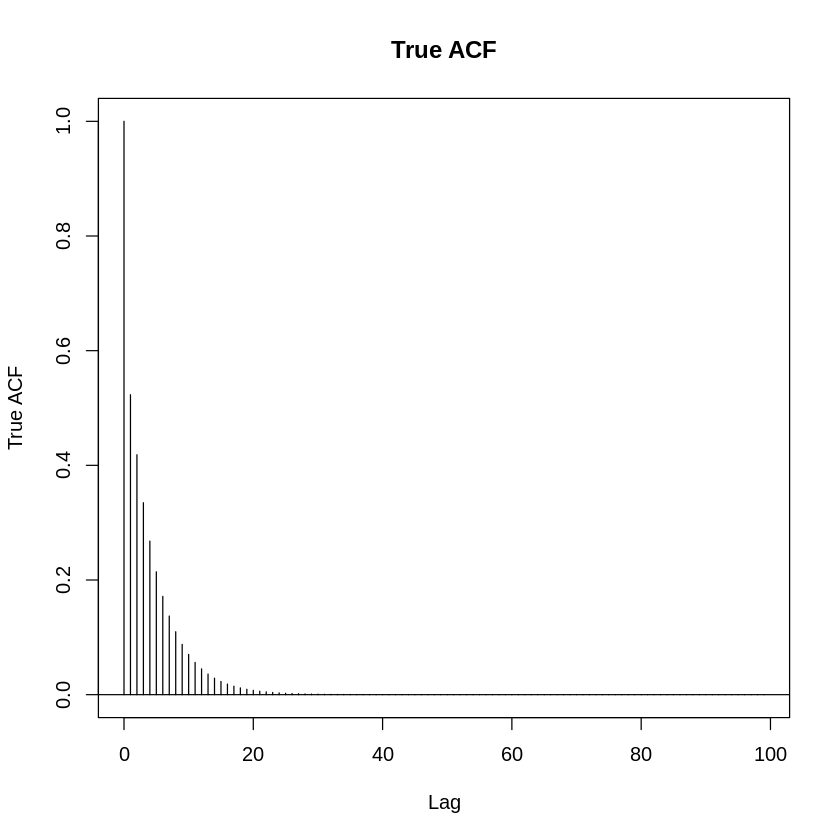

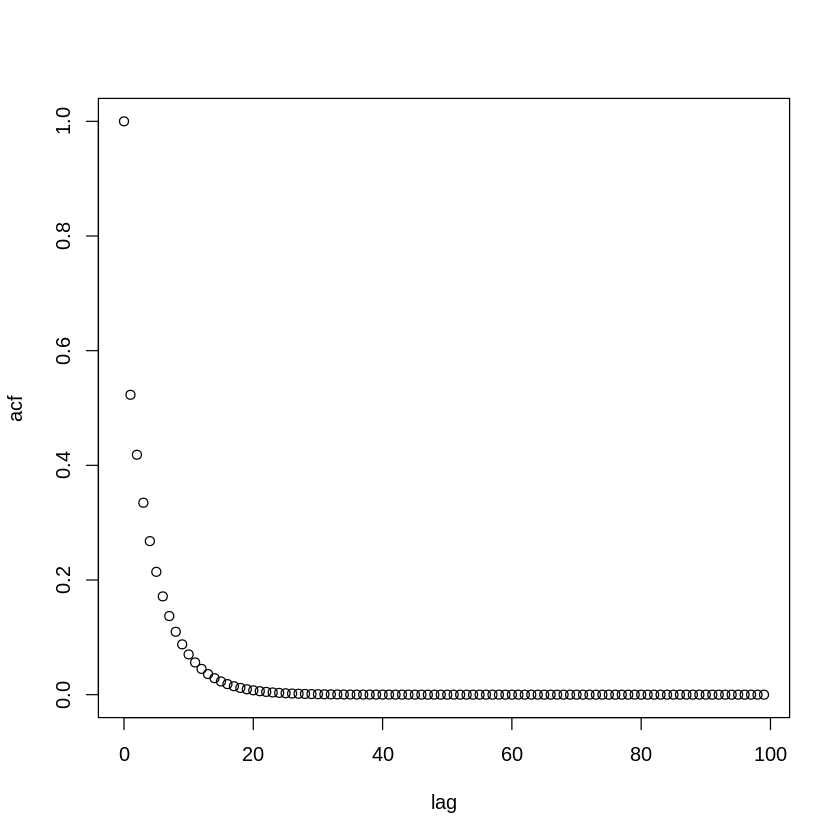

In [ ]:
theoreticalACF = armaTrueacf(model=list(order=c(1, 1), ar=0.8, ma=-0.4), lag.max=99,doplot=T)
plot(theoreticalACF)

**Comments**
- The theoretical autocorrelation shows an exponentially diminishing ACF value as lag increases.
- The ACF becomes negligible at approximately lag 30 as it approaches 0.
- The ACF follows the formula defined in TSA lecture 3 for stationary ARMA(1,1) process where $\rho_1 = \frac{(\phi - \theta)(1-\theta\phi)}{1-2\theta\phi + \theta^2}$
- $\rho_1$ is found to be 0.5230769231, which matches the result display in the plot above at lag = 1.


**(b) Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match
the theoretical ACF from part (a)?**

In [ ]:
calculateAutocorrelation <- function(ar, ma, n, maxLag, plot, isTDistribution) {
    set.seed(123)
    
    if (isTDistribution) {
        # the ma value must be negated by multiplying -1.
        values <- dt(arima.sim(model = list(ar = ar ,ma = -1 * ma), n = n), 6)
    } else {
        values <- arima.sim(model = list(ar = ar ,ma = ma), n = n)
    }
    if (plot) {
            plot.ts(values)
        }
    
    acf(values, lag.max = 100, main = "Plot ACF")
    pacf(values, lag.max = 100, main = "Plot PACF")
    return (values)
}

plotEACF <- function (data) {
    eacf(data, ar.max = 10, ma.max = 10)
}

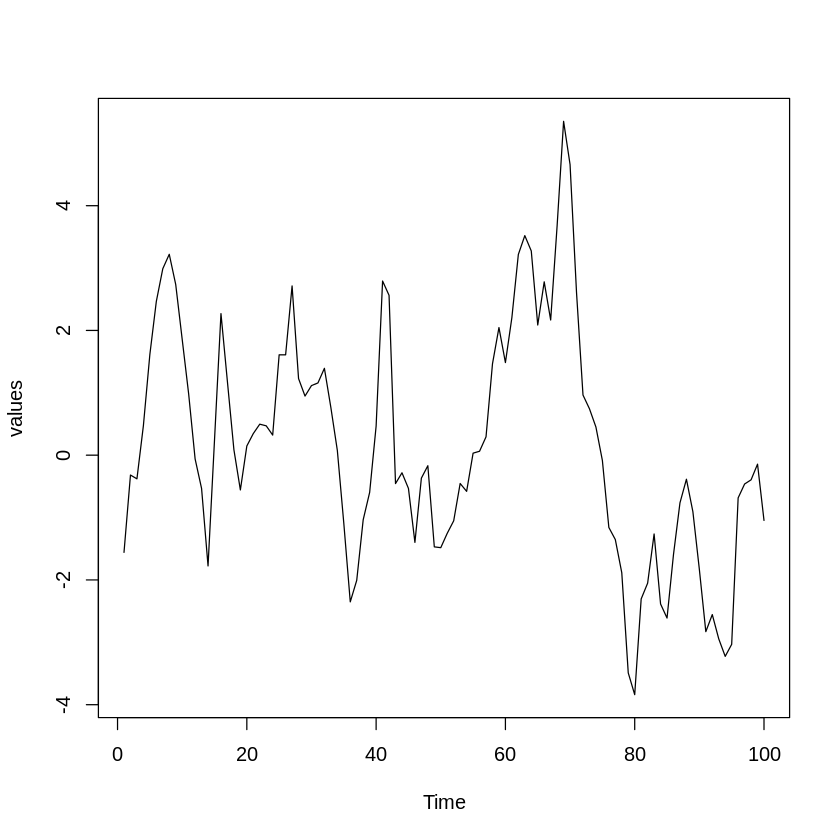

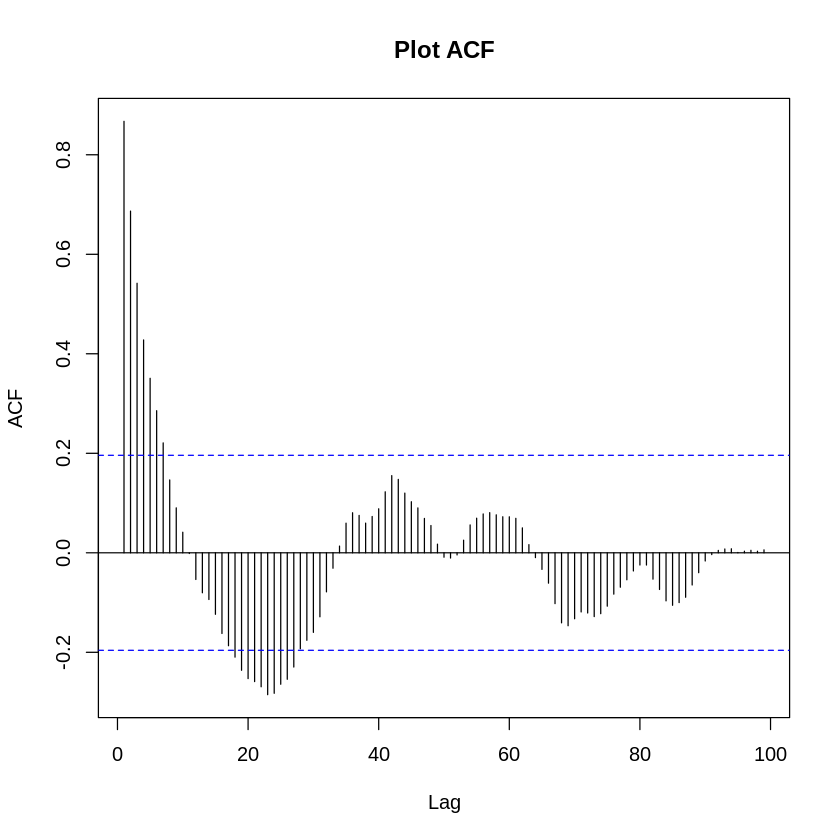

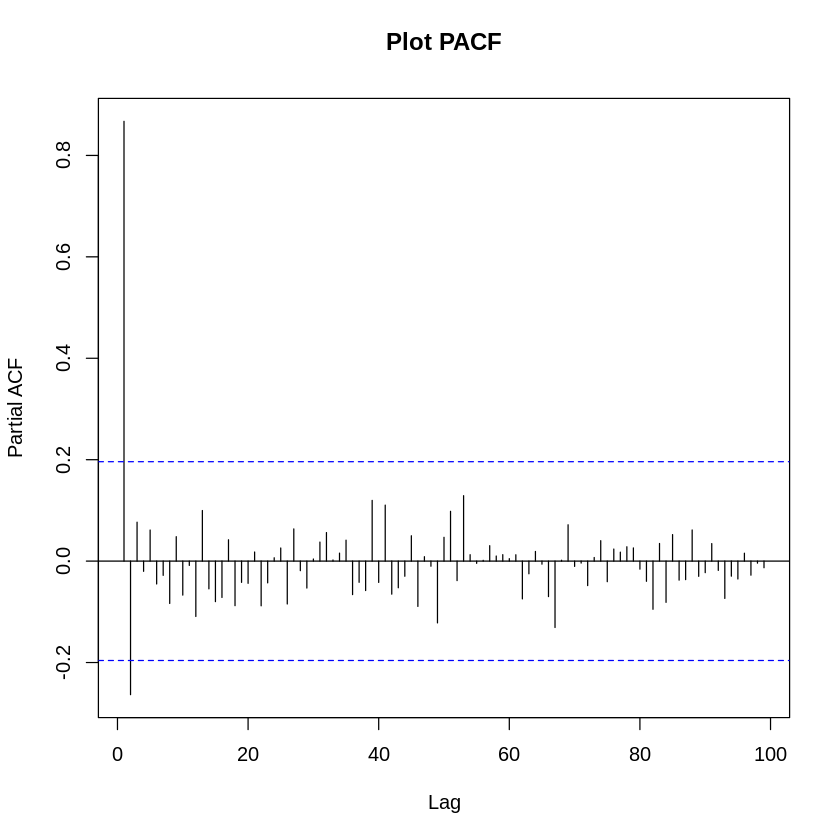

In [ ]:
data = calculateAutocorrelation(0.8, 0.4, 100, 99, TRUE, FALSE)

The treshold is $\frac{2}{\sqrt{n}} = \frac{2}{\sqrt{100}} = 0.2 $

The sample ACF appears exceeds the treshold around the lag = 20 point. 

The sample PACF does have a very clear cut-off after the lag k = 1 (the values is less than the treshold). This suggests that the time series has a characteristic of an MA process.

Since the given $\phi$ of 0.8 > 0, then the ACF smoothly damps out.

The theoretical ACF shows a damping behavior as it oscillates between positive and negative value as a result of sampling, which is a behavior of an AR process. 

Judging from the ACF, and PACF plots, it is supported that the time series could follow an ARMA process.



**c) Calculate and interpret the sample EACF for this series. Does the EACF help you specify the correct orders
for the model?**

In [ ]:
plotEACF(data)

AR/MA
   0 1 2 3 4 5 6 7 8 9 10
0  x x x x x x x o o o o 
1  x o o o o o o o o o o 
2  x o o o o o o o o o o 
3  x o o o o o o o o o o 
4  x x x o o o o o o o o 
5  x x x o o o o o o o o 
6  x o x o o o o o o o o 
7  x o x x o o o o o o o 
8  x o x x x o o o o o o 
9  x x o x x o o o o o o 
10 o x o x o o o x o o o 


Based on the sample EACF obtained, it can be observed that $\rho_0(0) $ , $\rho_0(1) $, and $\rho_1(0) $ are insignificant. 

$\rho_1(1) $ appears to be the first autocorrelation that fails the null hypothesis test, suggesting that the time series follow an ARMA(1,1) model

**(d) Repeat parts (b) and (c) with a new simulation using the same parameter values but sample size 𝑛 = 48.**

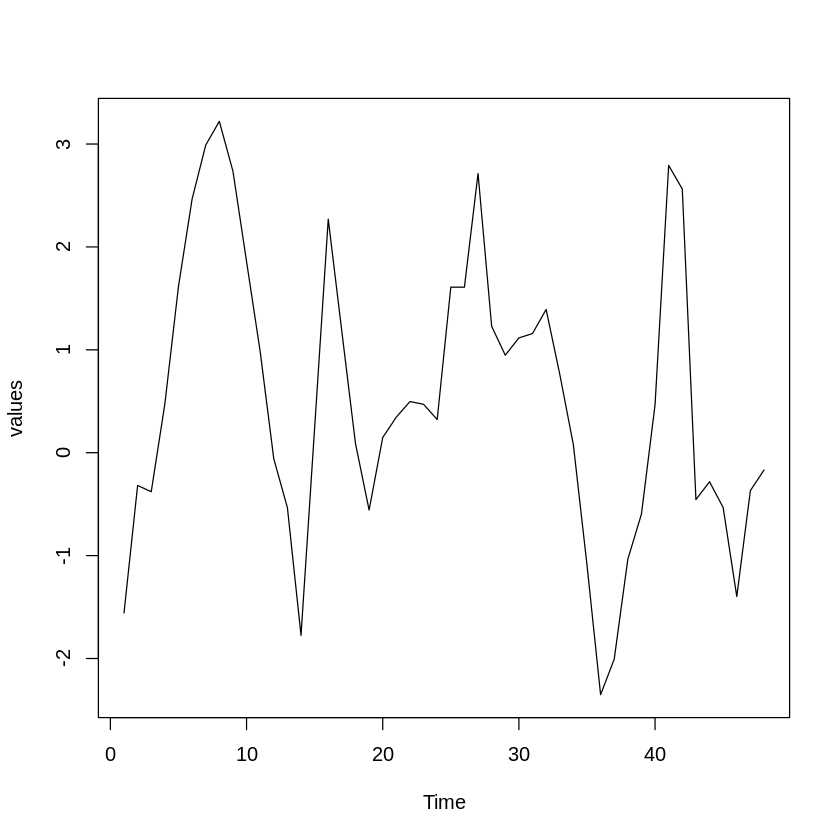

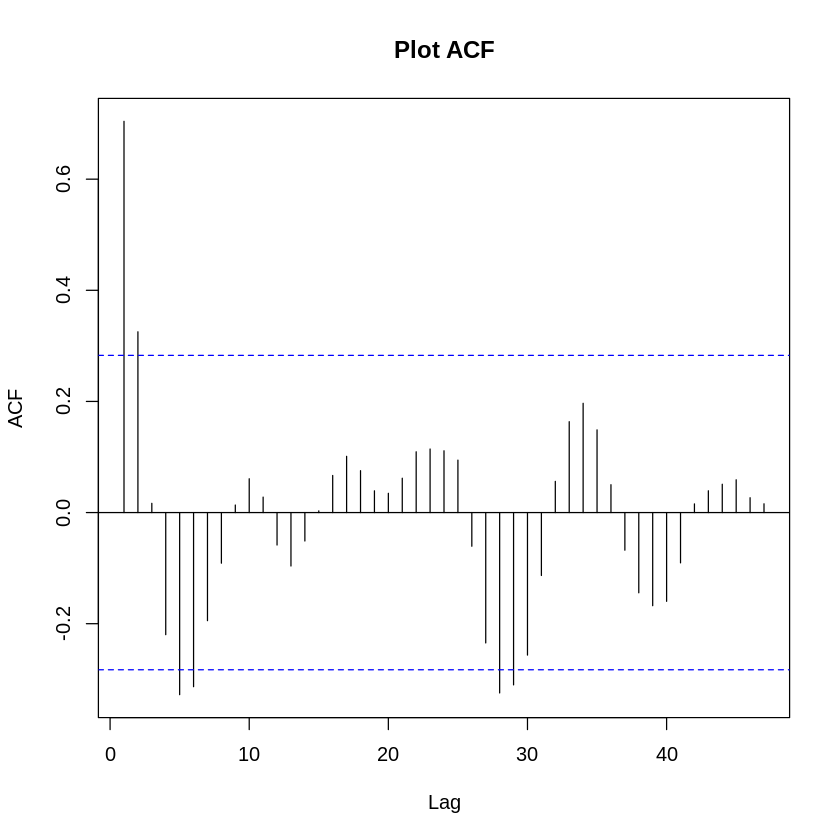

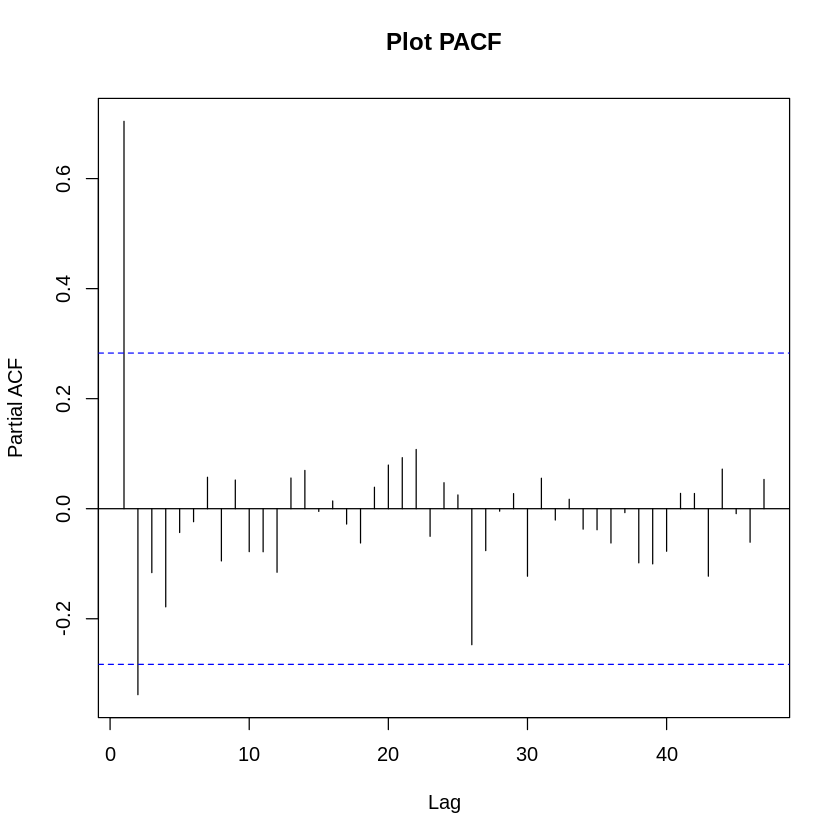

In [ ]:
data = calculateAutocorrelation(0.8, 0.4, 48, 47, TRUE, FALSE)

As n decreased to 48, the new treshold is $\frac{2}{\sqrt{n}} = \frac{2}{\sqrt{48}} = 0.2886751346 $

The sample PACF does have a very clear cut-off after the lag k = 1 (the values is less than the treshold). This suggests that the time series has a characteristic of an MA process.

The sample ACF appears to exceed the treshold around the lag = 0, 1, 4, 5, 28, 29. Since the given $\phi$ of 0.8 > 0, then the ACF smoothly damps out. The theoretical ACF shows a damping behavior as it oscillates between positive and negative value as a result of the samling, which is a behavior of an AR process. 

Judging from the ACF, and PACF plots, it is supported that the time series follow an ARMA process.



In [ ]:
plotEACF(data)

AR/MA
   0 1 2 3 4 5 6 7 8 9 10
0  x x o o x x o o o o o 
1  x o o o o o o o o o o 
2  o o o o o o o o o o o 
3  o x o o o o o o o o o 
4  o o o o o o o o o o o 
5  x o o o o o o o o o o 
6  o o o o o o o o o o o 
7  o x o o o o o o o o o 
8  x o o o o o o o o o o 
9  x o o o o o o o o o o 
10 x o o o o o o o o o o 


The effect of reducing n from 100 to 48 shows that the pattern of the sample EACF becomes much less clearly defined 

However, it can be observed that $\rho_1(0) $ , $\rho_1(1) $, and $\rho_2(0) $ are insignificant. Thus, it can be concluded that the time series follow the ARMA(1,1) model.

**(e) Repeat parts (b) and (c) with a new simulation using the same parameter values but sample size 𝑛 = 200.**

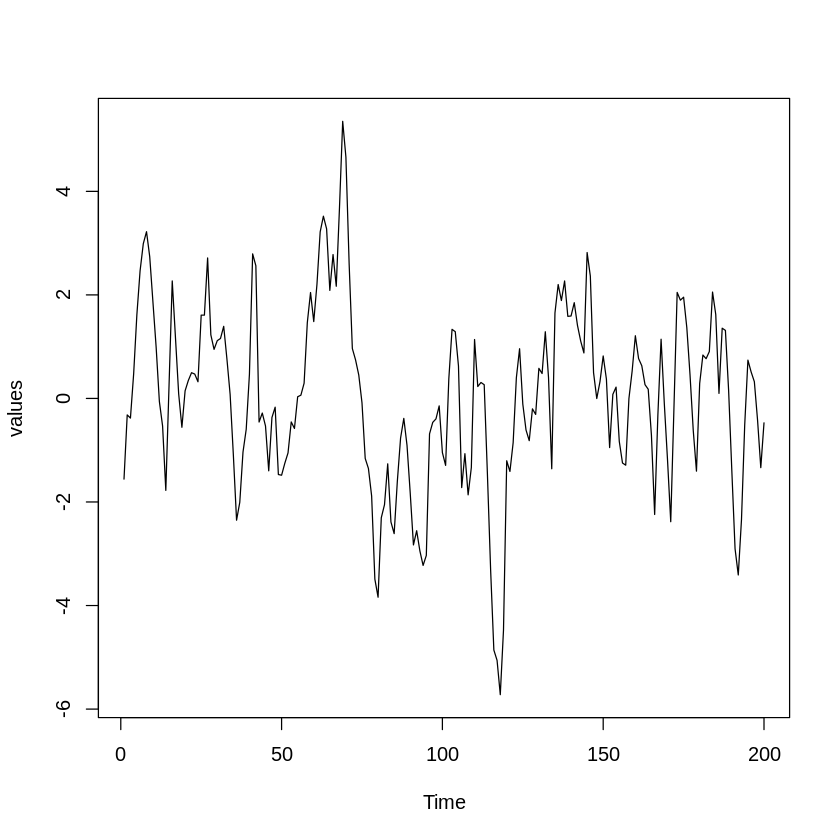

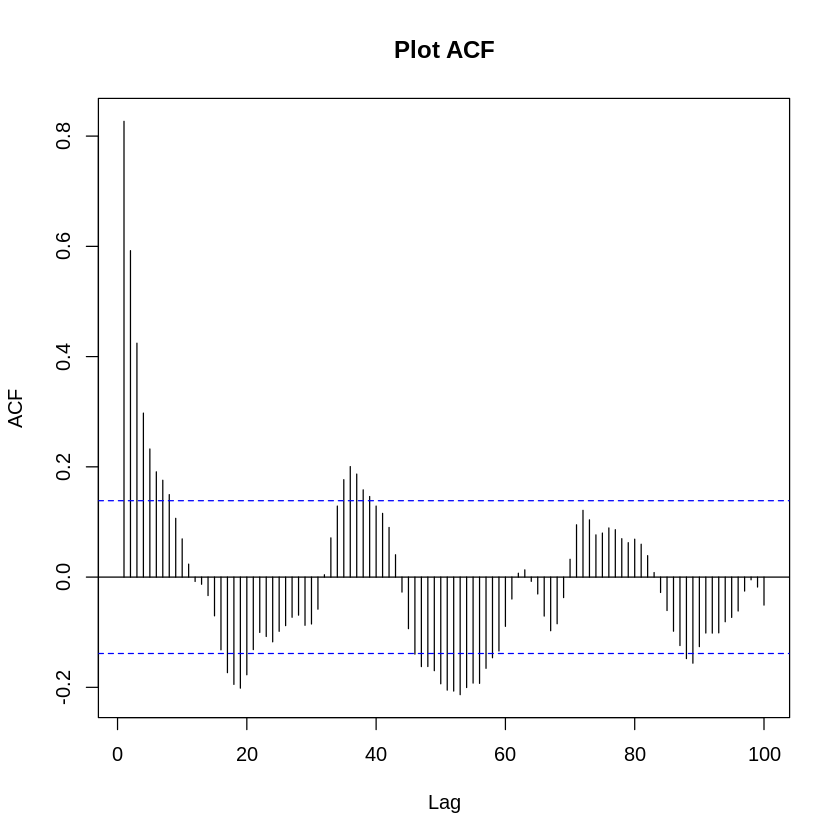

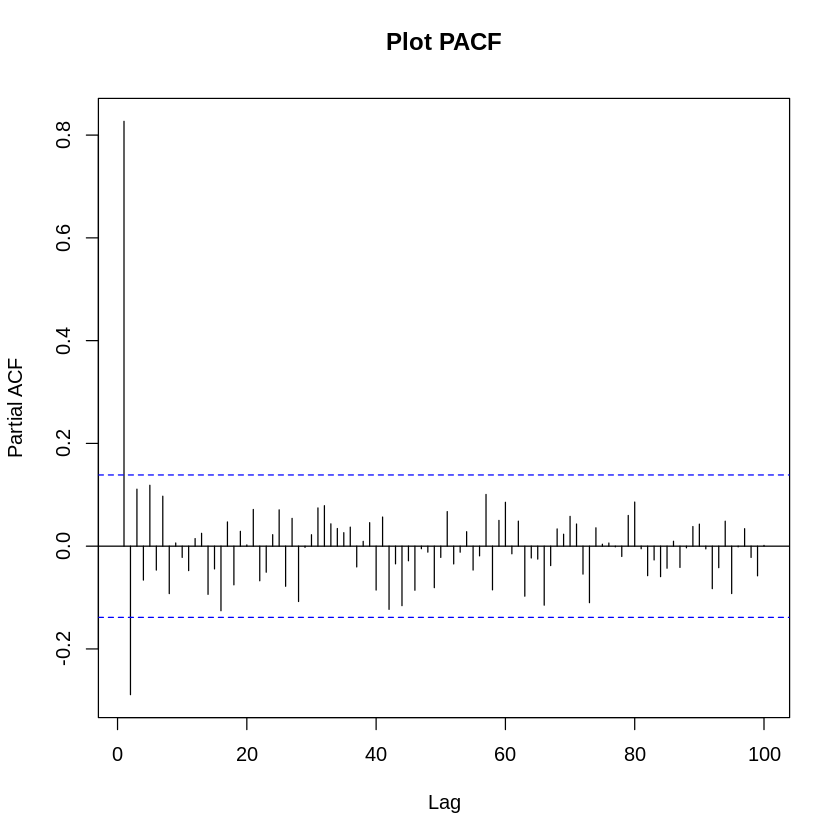

In [ ]:
data = calculateAutocorrelation(0.8, 0.4, 200, 199, TRUE, FALSE)

As n decreased to 48, the new treshold is $\frac{2}{\sqrt{n}} = \frac{2}{\sqrt{200}} = 0.1414213562 $

The sample PACF does have a very clear cut-off after the lag k = 1 (the values is less than the treshold). This suggests that the time series has a characteristic of an MA process.

The sample ACF appears to exceed the treshold in multiple ranges of lags.

Since the given $\phi$ of 0.8 > 0, then the ACF smoothly damps out. The theoretical ACF shows a damping behavior as it oscillates between positive and negative value, which is a behavior of an AR process. 

Judging from the ACF, and PACF plots, it is supported that the time series follow an ARMA process.

In [ ]:
plotEACF(data)

AR/MA
   0 1 2 3 4 5 6 7 8 9 10
0  x x x x x x x x o o o 
1  x o o o o o o o o o o 
2  x o o o o o o o o o o 
3  x o o o o o o o o o o 
4  x x o o o o o o o o o 
5  x x x o o o o o o o o 
6  x x x o x o o o o o o 
7  x x x x x x o o o o o 
8  o x x x x x o o o o o 
9  x o x x x o o o o o o 
10 x x x o o x o o o o o 


The effect of increasing n = 100 to 200 shows that the pattern of the sample EACF becomes much more clearly defined. It can be easily observed that $\rho_1(0) $ , $\rho_1(1) $, and $\rho_2(0) $ are insignificant. The first significant value is at $\rho_1(1) $, suggesting that the tiem series follow an ARMA(1,1) model.

### Additional Discussions for Question 1

**Regarding the ACF plot**

It can be noticed that while the theoretical ACF shows a smooth exponentially diminishing plot, the actual ACF measured from the sample oscillates between positive and negative values. 

This characteristic can be attributed to the somewhat random nature of the values sampling. The sampled values may have a negatively correlated nature unlike the theoretical smooth decline of the correlation in the case of the theoretical ACF.

**Regarding the EACF**

According to the results from parts 1b to 1e, a relationship between the number of samples and how well the EACF can represent the ARMA(p, q) model is established. To make the EACF perform better in determinign p and q of an ARMA process, more samples will always results in a clearer result. Comapring n = 48 to n = 200, while both can suggest the conclusion that the model follows an ARMA(1,1) process, the n = 200 produces a much clearer triangular structure of significant values.


## 2. (10%) Simulate an ARMA(1,1) series with 𝜙 = 0.7, 𝜃 = −0.6, 𝑛 = 48 but with error terms from a t- distribution with degrees of freedom 6.

**(a) Display the sample EACF of the series. Is an ARMA(1,1) model suggested?**

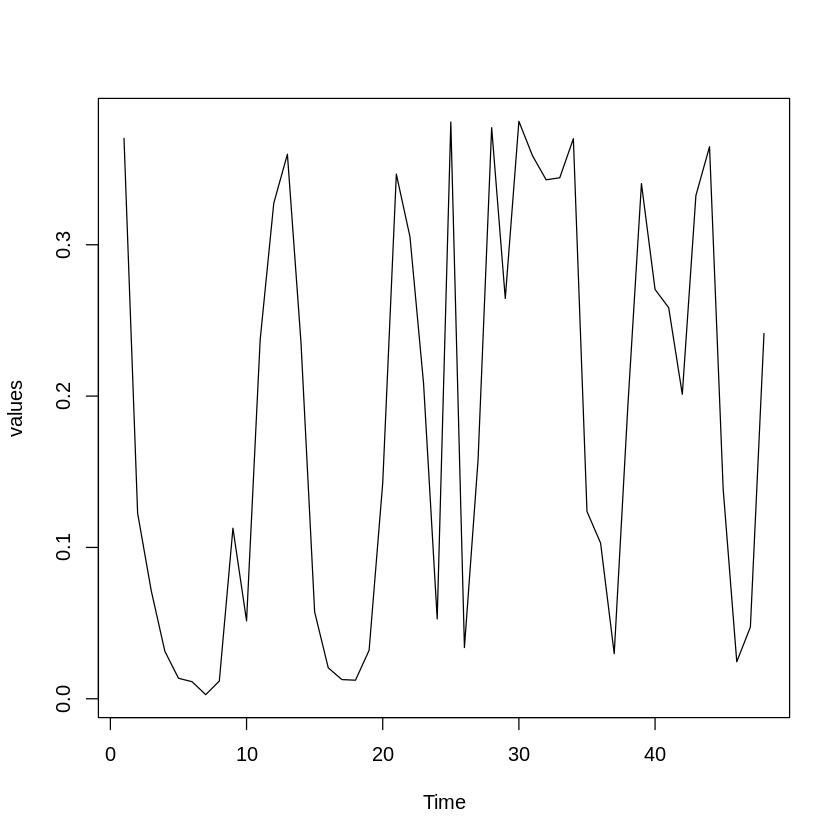

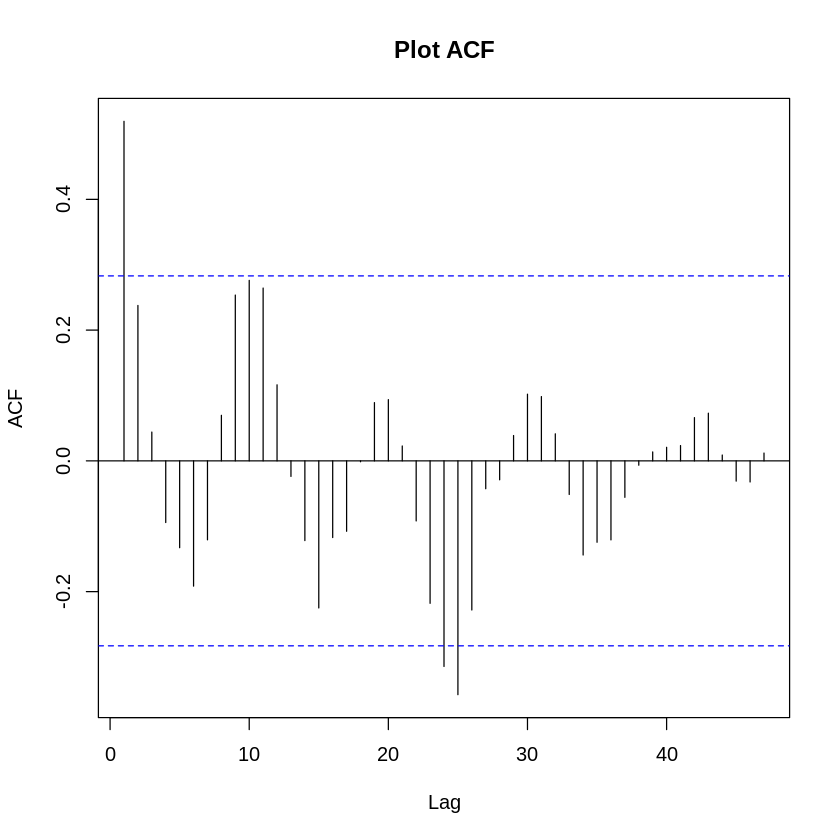

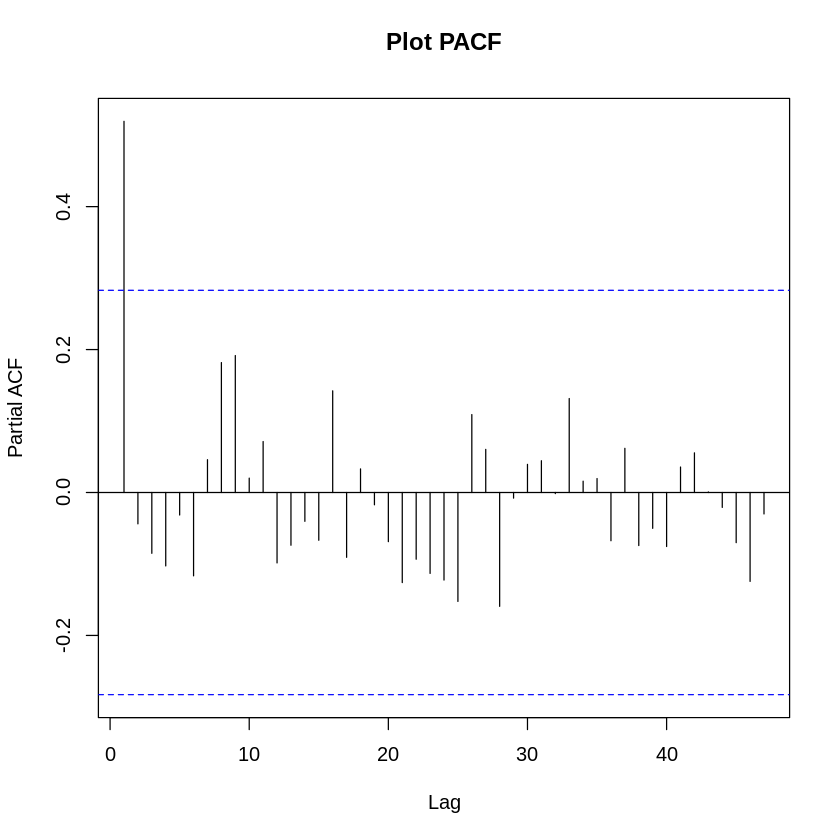

In [ ]:
# Note that the 6th parameter TRUE, specifies that the
# data will be added with t-distribution error with degree of freedom 6
# in the function specified earlier
 
data = calculateAutocorrelation(0.7, -0.6, 48, 47, TRUE, TRUE)

In [ ]:
plotEACF(data)

AR/MA
   0 1 2 3 4 5 6 7 8 9 10
0  x o o o o o o o o o o 
1  o o o o o o o o o o o 
2  x o o o o o o o o o o 
3  x o o o o o o o o o o 
4  o o o o o o o o o o o 
5  o x o o o o o o o o o 
6  o x o o o o o o o o o 
7  o o o o o o o o o o o 
8  x o o o o o o o o o o 
9  o x o o o o o o o o o 
10 o o o o o o o o o o o 


**Is an ARMA(1, 1) model suggested?**

The treshold of the ACF and PACF plots with n = 48 is calculated to be $\frac{2}{\sqrt{n}} = \frac{2}{\sqrt{48}} = 0.2886751346 $

Judging from the PACF, the value of PACF exceeds the treshold only at lag k = 0 and a cutoff behavior is observed. This suggests an MA behavio.

Judging from the ACF plot, the values appears to be damped as lag k increases. The tailoff behavior can be observed, sugggesting an AR process behavior.

Judging from the sample EACF, the first significant value occurs at $\rho_0(0) $. By observation, a triangular shape of significant values of autocorrelation is rather difficult to observ. $\rho_1(0)$ and $\rho_1(2)$ suggests an insignificant value, whereas $\rho_1(1)$ suggests a significant value.

Additionally, in an identification of an ARMA process, we must assume that the process is ARMA(1, something)

Thus, it can be concluded that an ARMA(1) model is suggested, rather than the ARMA(1, 1) model.

**(b) Estimate 𝜙 and 𝜃 from the series and comment on the results.**

In [ ]:
arma(data, p = 1, q = 1)

$phi
[1] 0.4514452

$theta
[1] 0.1167557

$sigma2
[1] 0.01337647

$aicc
[1] -63.97647

$se.phi
[1] 0.2224554

$se.theta
[1] 0.2453777

The $\phi$ is estimated to be 0.451445163402523

the $\theta$ is estimated to be -0.116755658060057

These values are different from the given value of 𝜙 = 0.7, 𝜃 = −0.6.

Such difference can be attributed to the addition of the noise with t-distribution and degree-of-freedom of 6.

### Additional Discussion for Question 2

**Regarding noise added**

Fromthe results achieved in question 1d with samling of n = 48, the EACF is already already unclear due to the low amount of samles. By introducing an additional noise of t-distribution with degree of freedom 6, the EACF suggests a lot more significant correlations. This makes it even harder to determine the possible ARMA(p, q) model. Without the assumption that the estimateion should be an ARMA(1, ?) model it won't be possible to reach the conclusino that the data follows an AR(1) model instead of ARMA(1,1).

## 3. (20%) The data file named robot contains a time series obtained from an industrial robot. The robot was put through a sequence of maneuvers, and the distance from a desired ending point was recorded in inches.

**(a) Display the time series plot of the data. Based on this information, do these data appear to come from a
stationary or nonstationary process?**

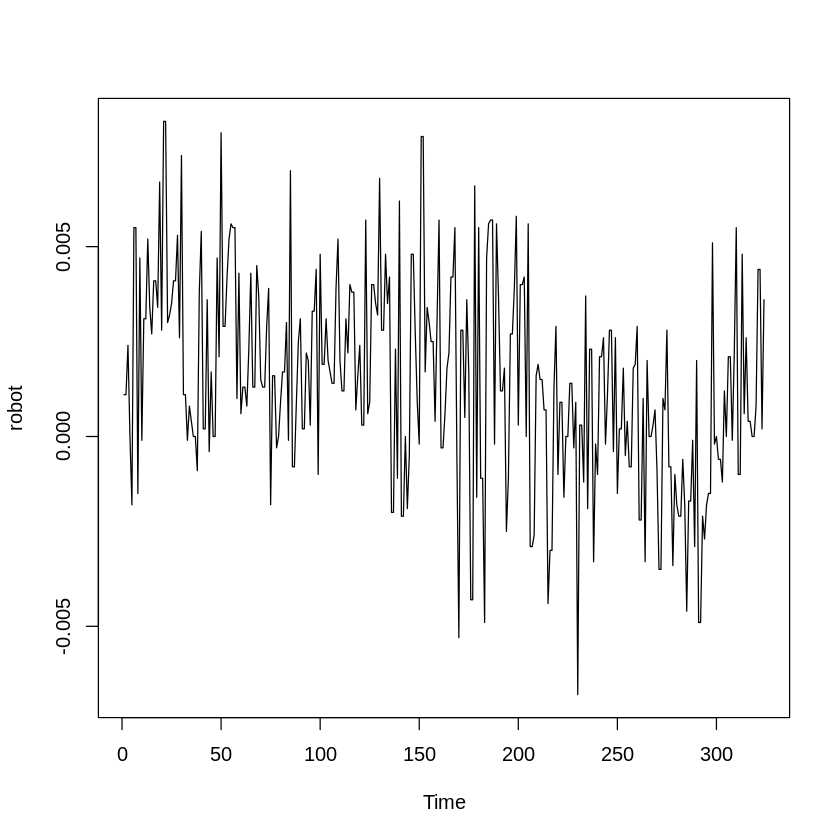

In [ ]:
robotData <- read.csv(file = 'TSA HW06.robot.csv')
plot(ts(robotData))


**Q: Based on this information, do these data appear to come from a stationary or stationary process?**

Data samlped from the real world is often non-stationary. 

This time series does not appear to be a stationary process since a slight downward trend can be observed from the lower highs and lower lows.

**(b) Calculate and plot the sample ACF and PACF for these data. Based on this additional information, do these
data appear to come from a stationary or nonstationary process?**

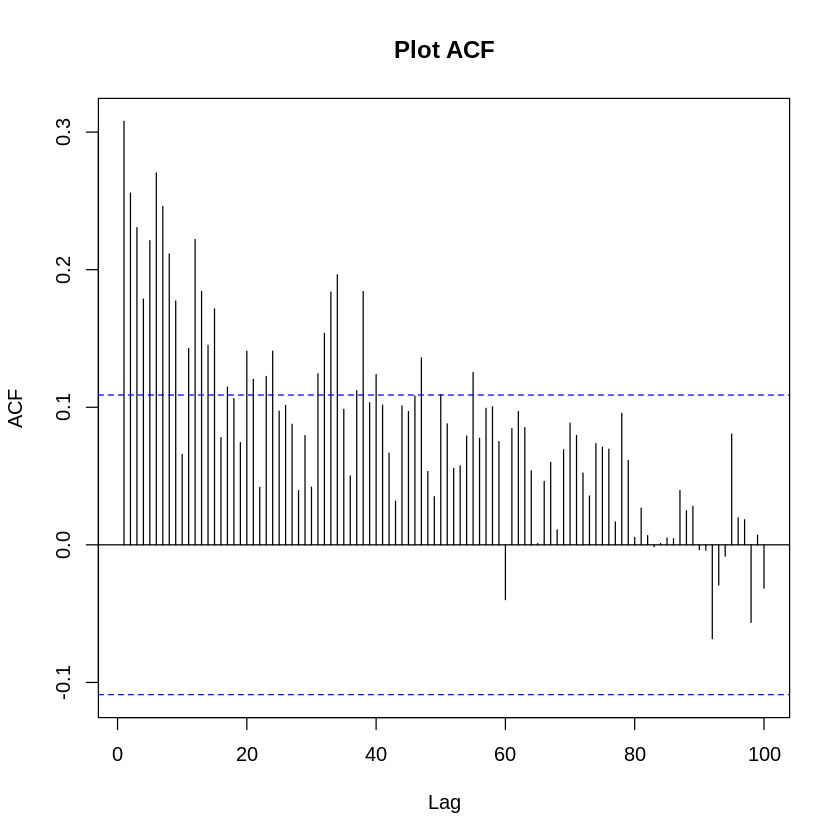

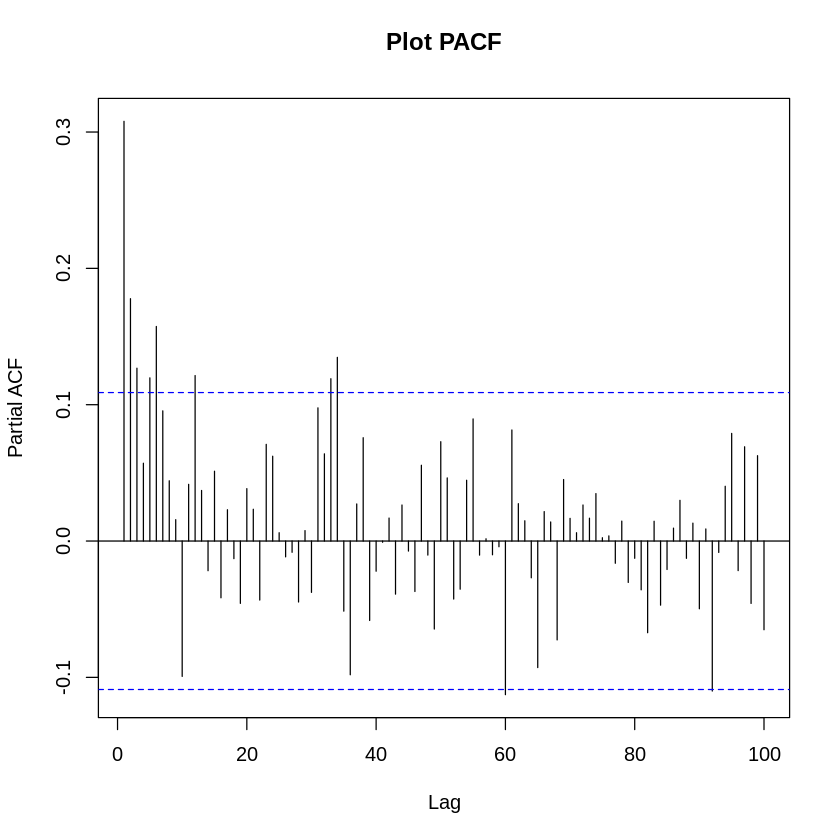

In [ ]:
# values <- arima.sim(model = list(robotSim), n = 100)
values <- ts(robotData)
acf(values, lag.max = 100, main = "Plot ACF")
pacf(values, lag.max = 100, main = "Plot PACF")

While from observation, the time series appear to be nonstationary, based on the additional information obtained from plotting the ACF and the PACF, it can be concluded that this process is **stationary**.

Judging from the PACF, the cutoff pattern can be observed. As k increases, the PACF value eventually does not exceed the treshold.

Juding from the ACF, a tailoff behavior is observed as the ACF values deviate from 0 at a much smaller degree as lag k increases.

**(c) Calculate and interpret the sample EACF.**

In [ ]:
plotEACF(values)

AR/MA
   0 1 2 3 4 5 6 7 8 9 10
0  x x x x x x x x x o x 
1  x o o o o o o o o o o 
2  x x o o o o o o o o o 
3  x x o o o o o o o o o 
4  x x x x o o o o o o o 
5  x x x o o o o o o o o 
6  x o o o o x o o o o o 
7  x o o x o x x o o o o 
8  x o o o o x o o o o o 
9  x x o o x x x o o o o 
10 x x o x x x x x o o o 


Based on the EACF values, the plot suggests that the model could be an ARMA(1,1) or an ARMA(6,1) process. 

Upon further observation, the triangular structure of the significant values based on the assumption that it is an ARMA(1,1) process is much more claerly defined than the assumption that it is an ARMA(6,1) process. Moreover, models with less amount of parameters are prefferd due to the reduction of complexity. 

Thus, based on the EACF, it can be concluded that this time series is an ARMA(1,1) process.

**(d) Estimate the parameters of an AR(1) model and IMA(1, 1) for these data, respectively.**

In [ ]:
(AR1 <- arima(values, order=c(1,0,0)))


Call:
arima(x = values, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.3074     0.0015
s.e.  0.0528     0.0002

sigma^2 estimated as 6.482e-06:  log likelihood = 1475.54,  aic = -2947.08

$\phi$ is estimated to be 0.3074

In [ ]:
(IMA11 <- arima(values, order=c(0,1,1)))


Call:
arima(x = values, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.8713
s.e.   0.0389

sigma^2 estimated as 6.069e-06:  log likelihood = 1480.95,  aic = -2959.9

$\theta$ is estimated to be -0.8713

**(e) Compare the results from parts (d) in terms of AIC and discuss the residual tests.**

In [ ]:
AIC(AR1)

[1] -2945.078

In [ ]:
AIC(IMA11)

[1] -2957.901

**Q: Compare the results and discuss the residual tests**

Akaike's Information Criteron (AIC) is an information criteria that punishes the number of parameters used. 

AIC is defined as:
AIC = $-2ln(\hat{L}) + 2r = n ln(2\pi) + n * ln(\hat{\sigma_a^2} + n + 2(p + q + 1) $

The smaller the AIC, the better the model fitting is.

Thus, it can be concluded that the IMA(1,1) model is a better fit for the robot data than the AR(1) model. 

Although, it is worth noticing that the AIC of both models are not very far apart, and the IMA(1,1) model is only slightly better than the AR(1) model.

### Additional Discussion for question 3

**About determining the stationarity of the time series**

When analyzing a time series model, it is important to consider multiple aspects of the data before making a judgment.

As see in the robot data time series, the time series itself, at the first glance, appears to be nonstationary due to the seemingly apparent trend. However, upon further inspection using ACF and PACF plots, both of which shows tailoff and cutoff behaviors, it can be concluded that the time series is stationary. Thus, the ARMA model could be applied. 

If we happen to disregard the time series based solely on the observation that the data might not be stationary, then we would never reach the conclusion that the robot time series can actually be estimated using the ARMA model.

**About information criteria**

In addition to the AIC, the Bayesian Information Criterion (BIC) can also be used to compare how well the model fits the time series. In a similar manner to the AIC, the smaller the BIC, the better the model fits the time series.